## Spike and Slab

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import seaborn as sns

In [81]:
priors = {
    # Original scale SS
    'spike_var': 1e-9,
    'spike_mean': 0.0,
    'slab_var': 1e-6,
    'slab_mean': 1.6e-3,

    # Log scale SS
    'log_spike_mean': -13.0,
    'log_spike_var': 10.0,
    'log_slab_mean': -6.5,
    'log_slab_var': 5e-1,

    # Sigma squared
    'sigma_squared_con': 1.5,
    'sigma_squared_rate': 8.0,

    # Background
    'mean_log_background_prior': jnp.log(1.9),
    'variance_log_background_prior': 5e-2,

    # tan_gamma_H and tan_gamma_V
    'tan_gamma_con': jnp.log(0.6),
    'tan_gamma_rate': 0.1,

    # b_H and b_V
    'b_mean': jnp.log(0.5),
    'b_var': 0.1,
}

We want a spike that includes values small enough to turn-off parameters. Meaning it includes values very close to zero. However, it must also contain values close to the slab so that the parameters can switch between the spike and the slab and not be stuck.

Ideally, in the context of gas emissions we want emissions below 1e-4 to potentially be in the spike. On the log-scale this is equivalent to -9.2.

In [82]:

spike_log = np.random.normal(priors["log_spike_mean"], np.sqrt(priors["log_spike_var"]), 100_000)
slab_log = np.random.normal(priors["log_slab_mean"], np.sqrt(priors["log_slab_var"]), 100_000)



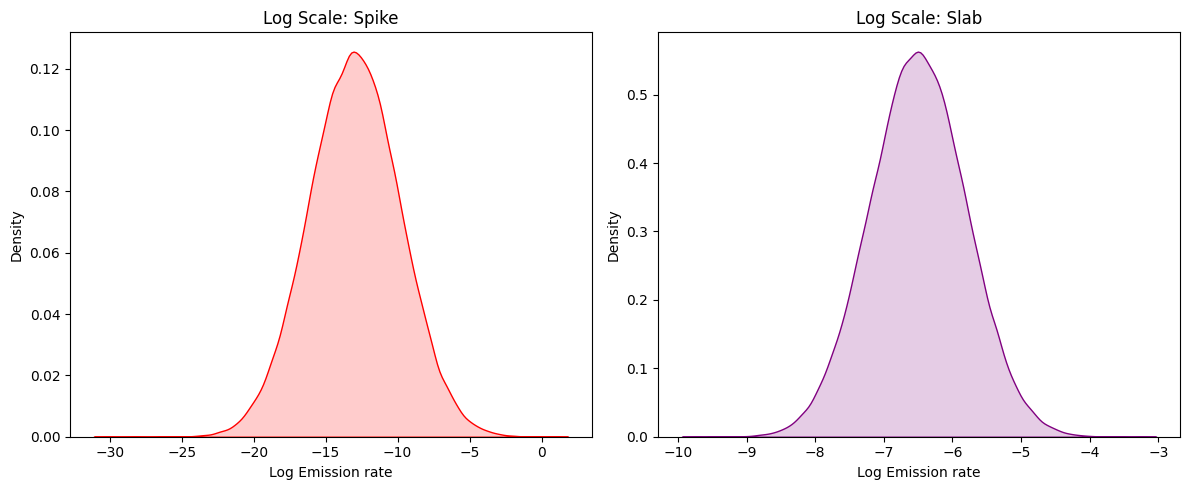

In [83]:
# setting up plot
plt.figure(figsize=(12, 5))
# log spike
plt.subplot(1, 2, 1)
sns.kdeplot(spike_log, fill="True", color="red", alpha=0.2)
plt.title(f'Log Scale: Spike')
plt.xlabel('Log Emission rate')
plt.ylabel('Density')
# log slab
plt.subplot(1, 2, 2)
sns.kdeplot(slab_log, fill="True", color="purple", alpha=0.2)
plt.title(f'Log Scale: Slab')
plt.xlabel('Log Emission rate')
plt.ylabel('Density')
# plotting
plt.tight_layout()
# plt.savefig("Log Scale: Spike and Slab.pdf", dpi=300, bbox_inches="tight")
plt.show()


The next plot shows the spike and slab overlayed before these have been reweighted by the parameter theta. Theta is the percentage of cells we believe contains a source, it is a prior on the sparsity.

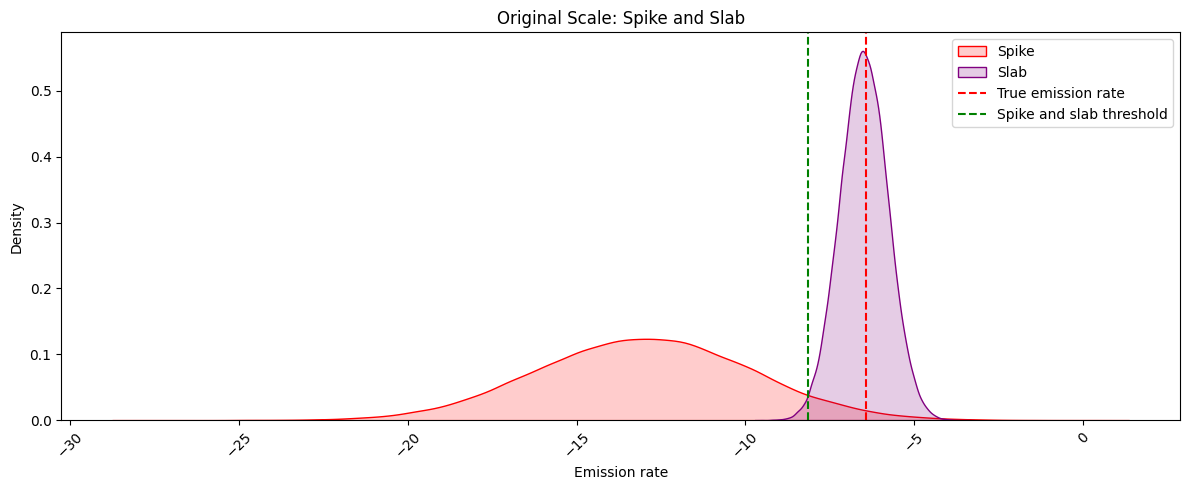

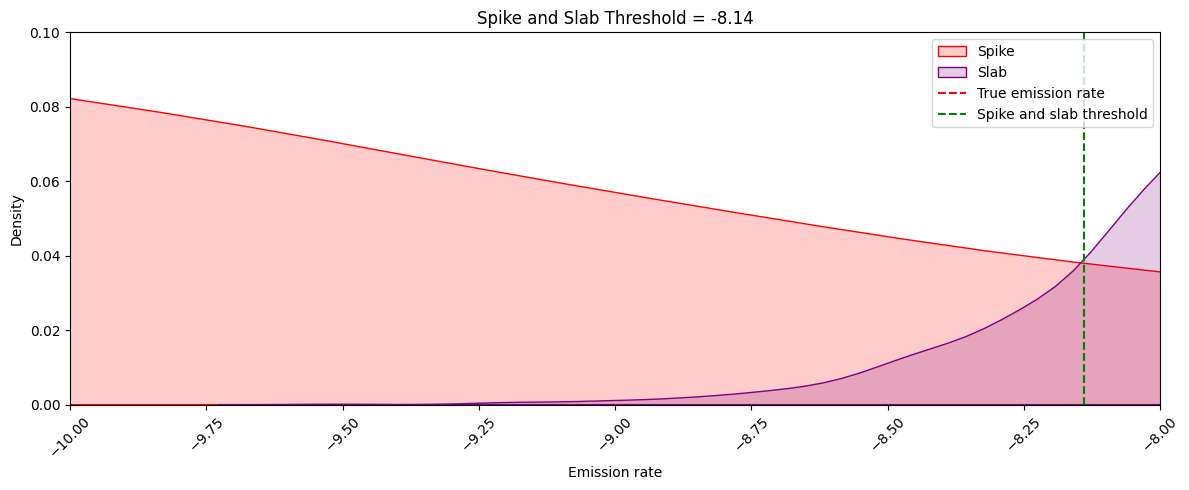

In [73]:
# Full view
plt.figure(figsize=(12, 5))
sns.kdeplot(spike_log, fill="True", color="red", alpha=0.2, label='Spike')
sns.kdeplot(slab_log, fill="True", color="purple", alpha=0.2, label='Slab')
plt.title(f'Original Scale: Spike and Slab')
plt.xlabel('Emission rate')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.axvline(-6.43775165, color='red', linestyle='--', label='True emission rate')
plt.axvline(-8.14, color='green', linestyle='--', label='Spike and slab threshold')
plt.legend(loc='upper right')
# plotting
plt.tight_layout()
# plt.savefig("Spike and Slab threshold full view.pdf", dpi=300, bbox_inches="tight")
plt.show()

# Focused view
plt.figure(figsize=(12, 5))
sns.kdeplot(spike_log, fill="True", color="red", alpha=0.2, label='Spike')
sns.kdeplot(slab_log, fill="True", color="purple", alpha=0.2, label='Slab')
plt.title(f'Spike and Slab Threshold = {round(-8.14, 6)}')
plt.xlabel('Emission rate')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.xlim(-10, -8)
plt.ylim(0, 0.1)
plt.axvline(-6.43775165, color='red', linestyle='--', label='True emission rate')
plt.axvline(-8.14, color='green', linestyle='--', label='Spike and slab threshold')
plt.legend(loc='upper right')
# plotting
plt.tight_layout()
# plt.savefig("Spike and Slab threshold zoomed.pdf", dpi=300, bbox_inches="tight")
plt.show()


Next we overlay the spike and slab after a theta reweighting of 0.1. Meaning we believe there is 10% of cells containing a source

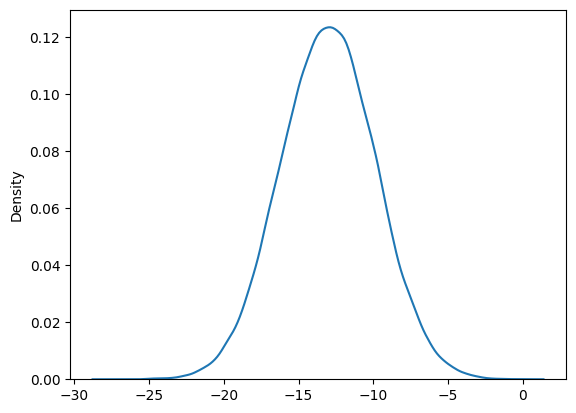

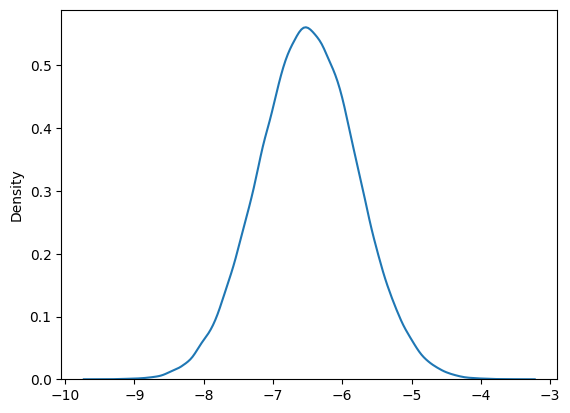

In [65]:
density_spike = sns.kdeplot(spike_log).get_lines()[0].get_data()
plt.show()
density_slab = sns.kdeplot(slab_log).get_lines()[0].get_data()
plt.show()
rescaled_spike = density_spike[1] * (1-0.1)
rescaled_slab = density_slab[1] * 0.1


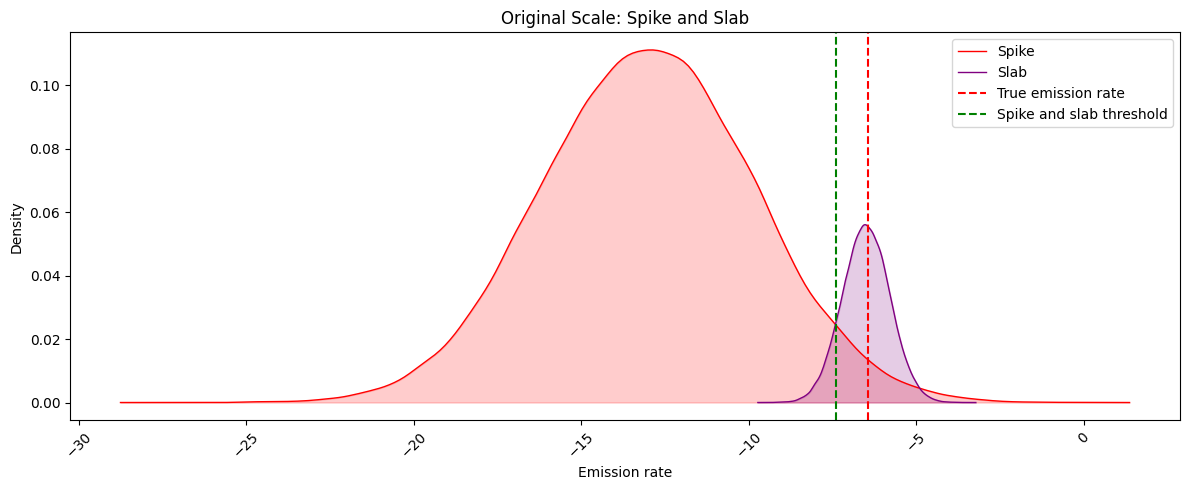

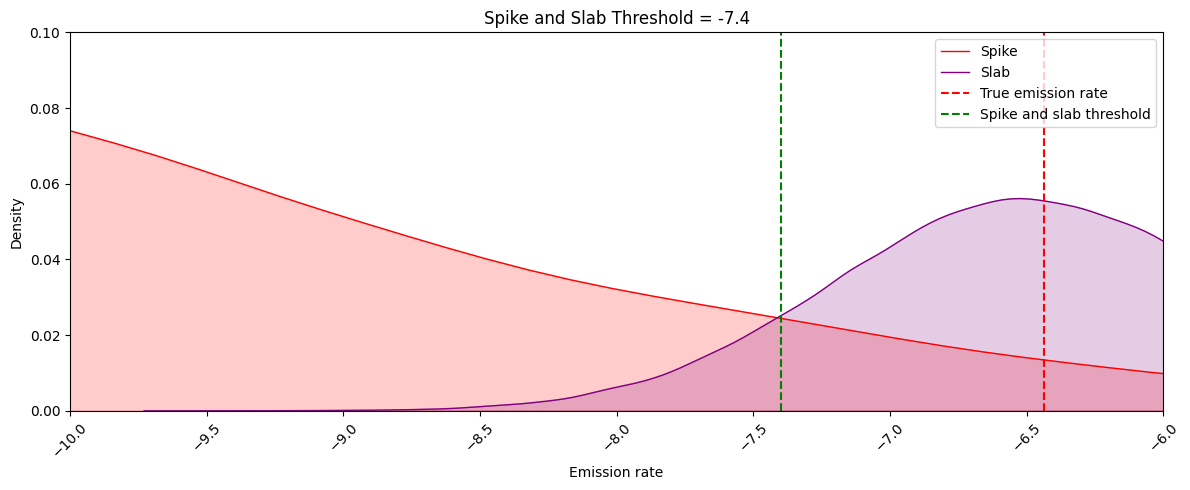

In [76]:
# Full view
plt.figure(figsize=(12, 5))
sns.lineplot(x=density_spike[0], y=rescaled_spike, color="red", linewidth=1, label='Spike')
sns.lineplot(x=density_slab[0], y=rescaled_slab, color="purple", linewidth=1, label='Slab')
plt.fill_between(density_spike[0], 0, rescaled_spike, alpha=0.2, color='red')
plt.fill_between(density_slab[0], 0, rescaled_slab, alpha=0.2, color='purple')
plt.title(f'Original Scale: Spike and Slab')
plt.xlabel('Emission rate')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.axvline(-6.43775165, color='red', linestyle='--', label='True emission rate')
plt.axvline(-7.4, color='green', linestyle='--', label='Spike and slab threshold')
plt.legend(loc='upper right')
# plotting
plt.tight_layout()
# plt.savefig("Spike and Slab threshold theta adjusted full.pdf", dpi=300, bbox_inches="tight")
plt.show()

# Focused view
plt.figure(figsize=(12, 5))
sns.lineplot(x=density_spike[0], y=rescaled_spike, color="red", linewidth=1, label='Spike')
sns.lineplot(x=density_slab[0], y=rescaled_slab, color="purple", linewidth=1, label='Slab')
plt.fill_between(density_spike[0], 0, rescaled_spike, alpha=0.2, color='red')
plt.fill_between(density_slab[0], 0, rescaled_slab, alpha=0.2, color='purple')
plt.title(f'Spike and Slab Threshold = {round(-7.4, 6)}')
plt.xlabel('Emission rate')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.xlim(-10, -6)
plt.ylim(0, 0.1)
plt.axvline(-6.43775165, color='red', linestyle='--', label='True emission rate')
plt.axvline(-7.4, color='green', linestyle='--', label='Spike and slab threshold')
plt.legend(loc='upper right')
# plotting
plt.tight_layout()
# plt.savefig("Spike and Slab threshold theta adjusted zoomed.pdf", dpi=300, bbox_inches="tight")
plt.show()




In [67]:
spike_con = jnp.exp(spike_log)
slab_con = jnp.exp(slab_log)


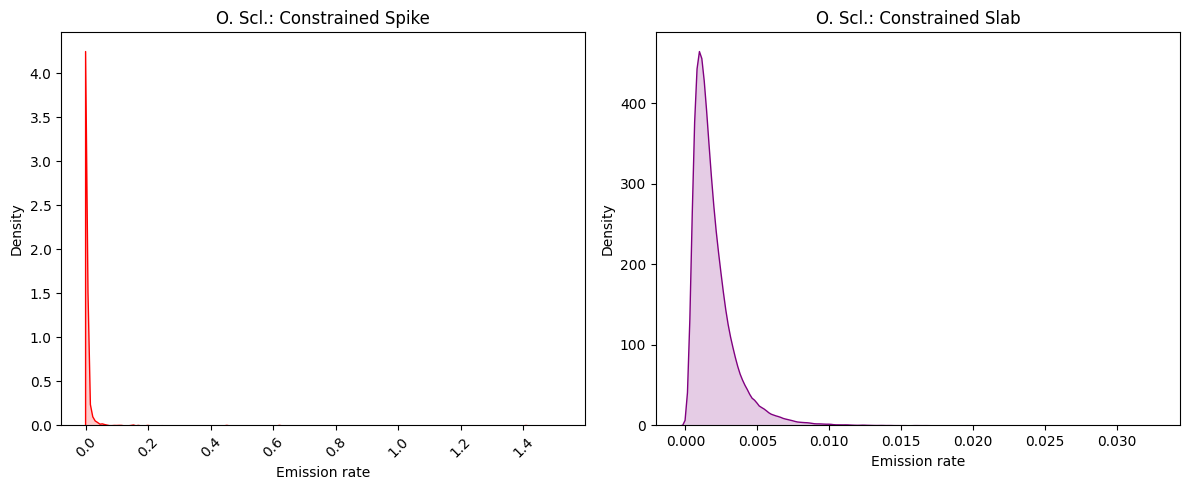

In [77]:
plt.figure(figsize=(12, 5))
# constrained spike
plt.subplot(1, 2, 1)
sns.kdeplot(spike_con, fill="True", color="red", alpha=0.2)
plt.title(f'O. Scl.: Constrained Spike')
plt.xlabel('Emission rate')
plt.ylabel('Density')
plt.xticks(rotation=45)
# constrained slab
plt.subplot(1, 2, 2)
sns.kdeplot(slab_con, fill="True", color="purple", alpha=0.2)
plt.title(f'O. Scl.: Constrained Slab')
plt.xlabel('Emission rate')
plt.ylabel('Density')
# plotting
plt.tight_layout()
# plt.savefig("Original Scale: Constrained Spike and Slab.pdf", dpi=300, bbox_inches="tight")
plt.show()